# Analysis of Magnetometer Data From Simulated Earth Orbit

## Data for 100 orbits, no eccentricity 

The first set of simulation data analyzed was for a perfectly circular,spin-stabilized equatorial orbit run for about 7 days.

Text(0, 0.5, 'B-Field Magnitude (nT)')

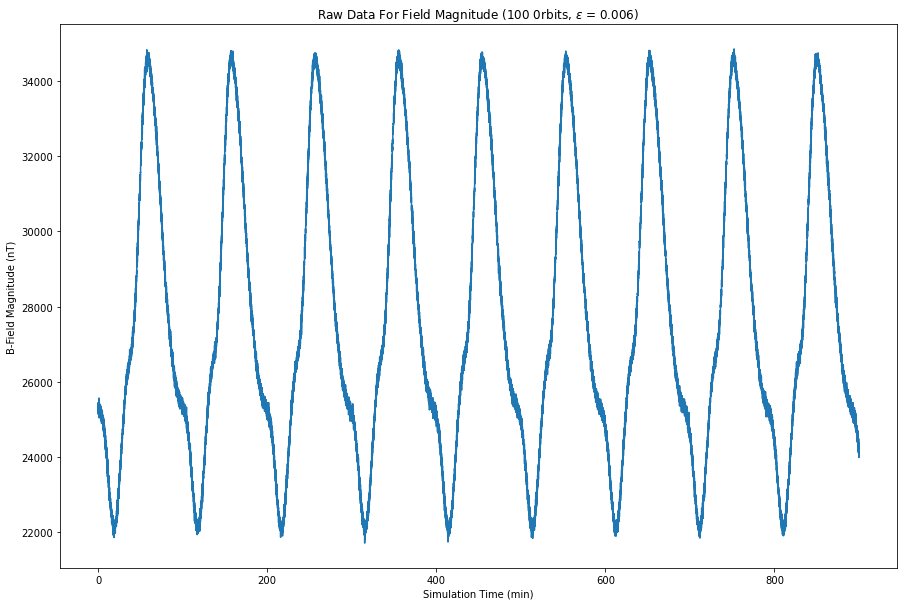

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append("src")
#import algorithms
from sinefit import sinfit     
from peakfinder import peakfinder
from smoothing import smoothTriangle

# import data from csv
data = np.genfromtxt('Data_Sets/e0_10O_axis.csv', delimiter=',')
time = data[:,0]
x_data = data[:,1]
y_data = data[:,2]
z_data = data[:,3]

# scalar magnitude used to allow for easier identification of orbit parameters
b_mag = np.sqrt((x_data)**2 + (y_data)**2 + (z_data)**2)


plt.rcParams["figure.figsize"]=15,10 
plt.plot(time, b_mag)
plt.title('Raw Data For Field Magnitude (100 0rbits, $\epsilon$ = 0.006)')
plt.xlabel('Simulation Time (min)')
plt.ylabel('B-Field Magnitude (nT)')


### Raw Data:

As expected there is little variation in the data due to the perfect orbit. The slight discrepancies in the peak values can be attributed completely to the noise modeling factored into the simulation


## Sinusoid Fitting:

Amplitude= -5087.467572704749, Angular freq.= 0.06356037522970524, Period = 98.85381079756606, Phase= 0.6838333269209343 


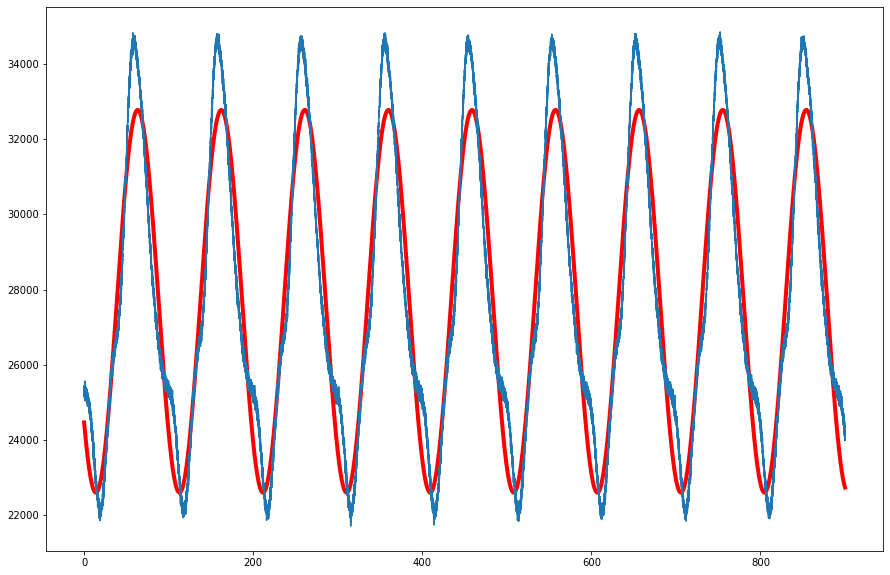

In [2]:
res = sinfit(time, b_mag)
plt.plot(time, res["fitfunc"](time), "r-", label="y fit curve", linewidth=4)
plt.plot(time, b_mag)
print( "Amplitude= %(amp)s, Angular freq.= %(omega)s, Period = %(period)s, Phase= %(phase)s " % res )

# outputs parameters of the fitted sine function. 

## Fit Analysis:

Through application of optical analysis, it is obvious that the sinusoid fit is an accurate representation of the data in terms of frequency and such. This information rather than accurate fitting for numbers is more important for the type of analysis being conducted. The 98 minute period provided by the fit is well within the expected range of about 1.5 hours that orbits in LEO generally follow. Any direct determinations of orbit geometry or spacecraft attitude would require other sensor inputs and filters to output state vectors, exponentially complicating the task at hand and well beyond the scope of this project.  

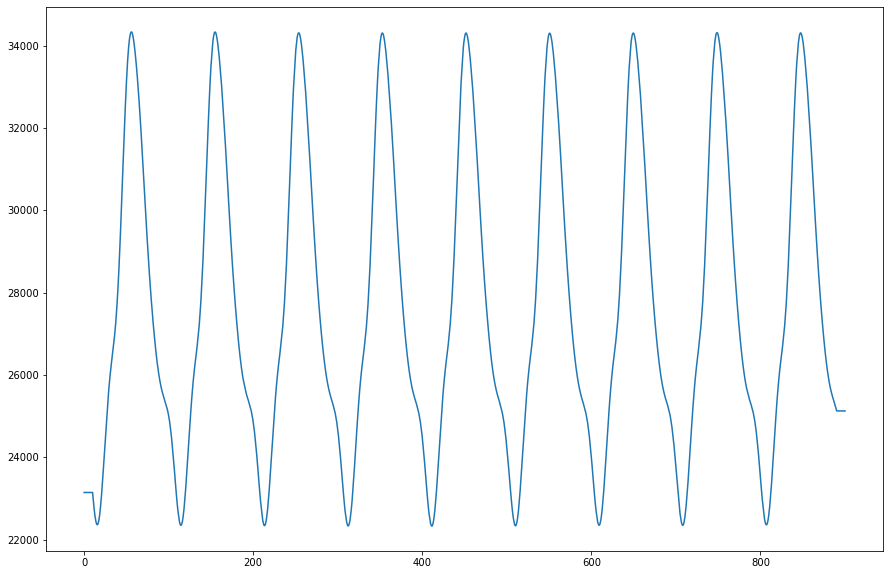

In [3]:
smooth = np.array(smoothTriangle(b_mag, 200))
plt.plot(time, smooth)

In [7]:
smooth = np.array(smooth)
ind_max2 = scipy.signal.argrelmax(smooth)
peaks, ind_max = peakfinder(smooth, time, 10)
print('My algorithm: ', ind_max, 'Scipy peakfinder: ', ind_max2)

My algorithm:  [1677, 4646, 7614, 10582, 13550, 16518, 19486, 22456, 25424] Scipy peakfinder:  (array([ 1677,  4646,  7614, 10582, 13550, 16518, 19486, 22456, 25424]),)


In [5]:
mxtime = []
mxdata = []
time2 = []
data2 = []

for i in ind_max: 
    mxtime = time[i]
    mxdata = b_mag[i]
    


        
        
mxsmooth = smoothTriangle(mxdata, 4)


bfit = sinfit(mxtime, mxsmooth)
plt.plot(time, bfit["fitfunc"](time), "r-", label="y fit curve", linewidth=4)
plt.scatter(mxtime, mxdata)


TypeError: object of type 'numpy.float64' has no len()

In [ ]:
print(bfit)

In [ ]:
1457.480870651502/60